Data Collection and Preprocessing

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import time

C:\Users\Tesla Laptops\AppData\Local\Temp\ipykernel_18480\3152887166.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
data = r"H:\My Drive\Masters\Machine Learning\Assignment #01\pulsar_stars.csv"

df = pd.read_csv(data)

In [4]:
df.shape

(17898, 9)

In [5]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [7]:
df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [8]:
df['target_class'].value_counts()/float(len(df))

target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

In [9]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('target_class', axis=1)
y = df['target_class']

# Apply SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced dataframe
df = pd.concat([X_resampled, y_resampled], axis=1)


In [10]:
df['target_class'].value_counts()/float(len(df))

target_class
0    0.5
1    0.5
Name: count, dtype: float64

In [11]:
df.shape

(32518, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32518 entries, 0 to 32517
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          32518 non-null  float64
 1   IP Sd            32518 non-null  float64
 2   IP Kurtosis      32518 non-null  float64
 3   IP Skewness      32518 non-null  float64
 4   DM-SNR Mean      32518 non-null  float64
 5   DM-SNR Sd        32518 non-null  float64
 6   DM-SNR Kurtosis  32518 non-null  float64
 7   DM-SNR Skewness  32518 non-null  float64
 8   target_class     32518 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 2.2 MB


In [13]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,32518.00,32518.00,32518.00,32518.00,32518.00,32518.00,32518.00,32518.00,32518.0
mean,86.67,43.01,1.66,7.88,29.32,39.76,5.82,65.94,0.5
std,38.62,8.17,1.97,12.32,41.75,24.51,4.81,95.74,0.5
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.0
25%,54.75,36.61,0.18,0.08,2.48,17.08,1.65,1.66,0.0
50%,95.90,43.51,0.63,1.31,6.68,32.19,5.23,28.10,0.5
75%,117.88,48.92,2.90,11.32,39.46,62.26,9.14,98.23,1.0
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.0


Text(0, 0.5, 'DM-SNR Skewness')

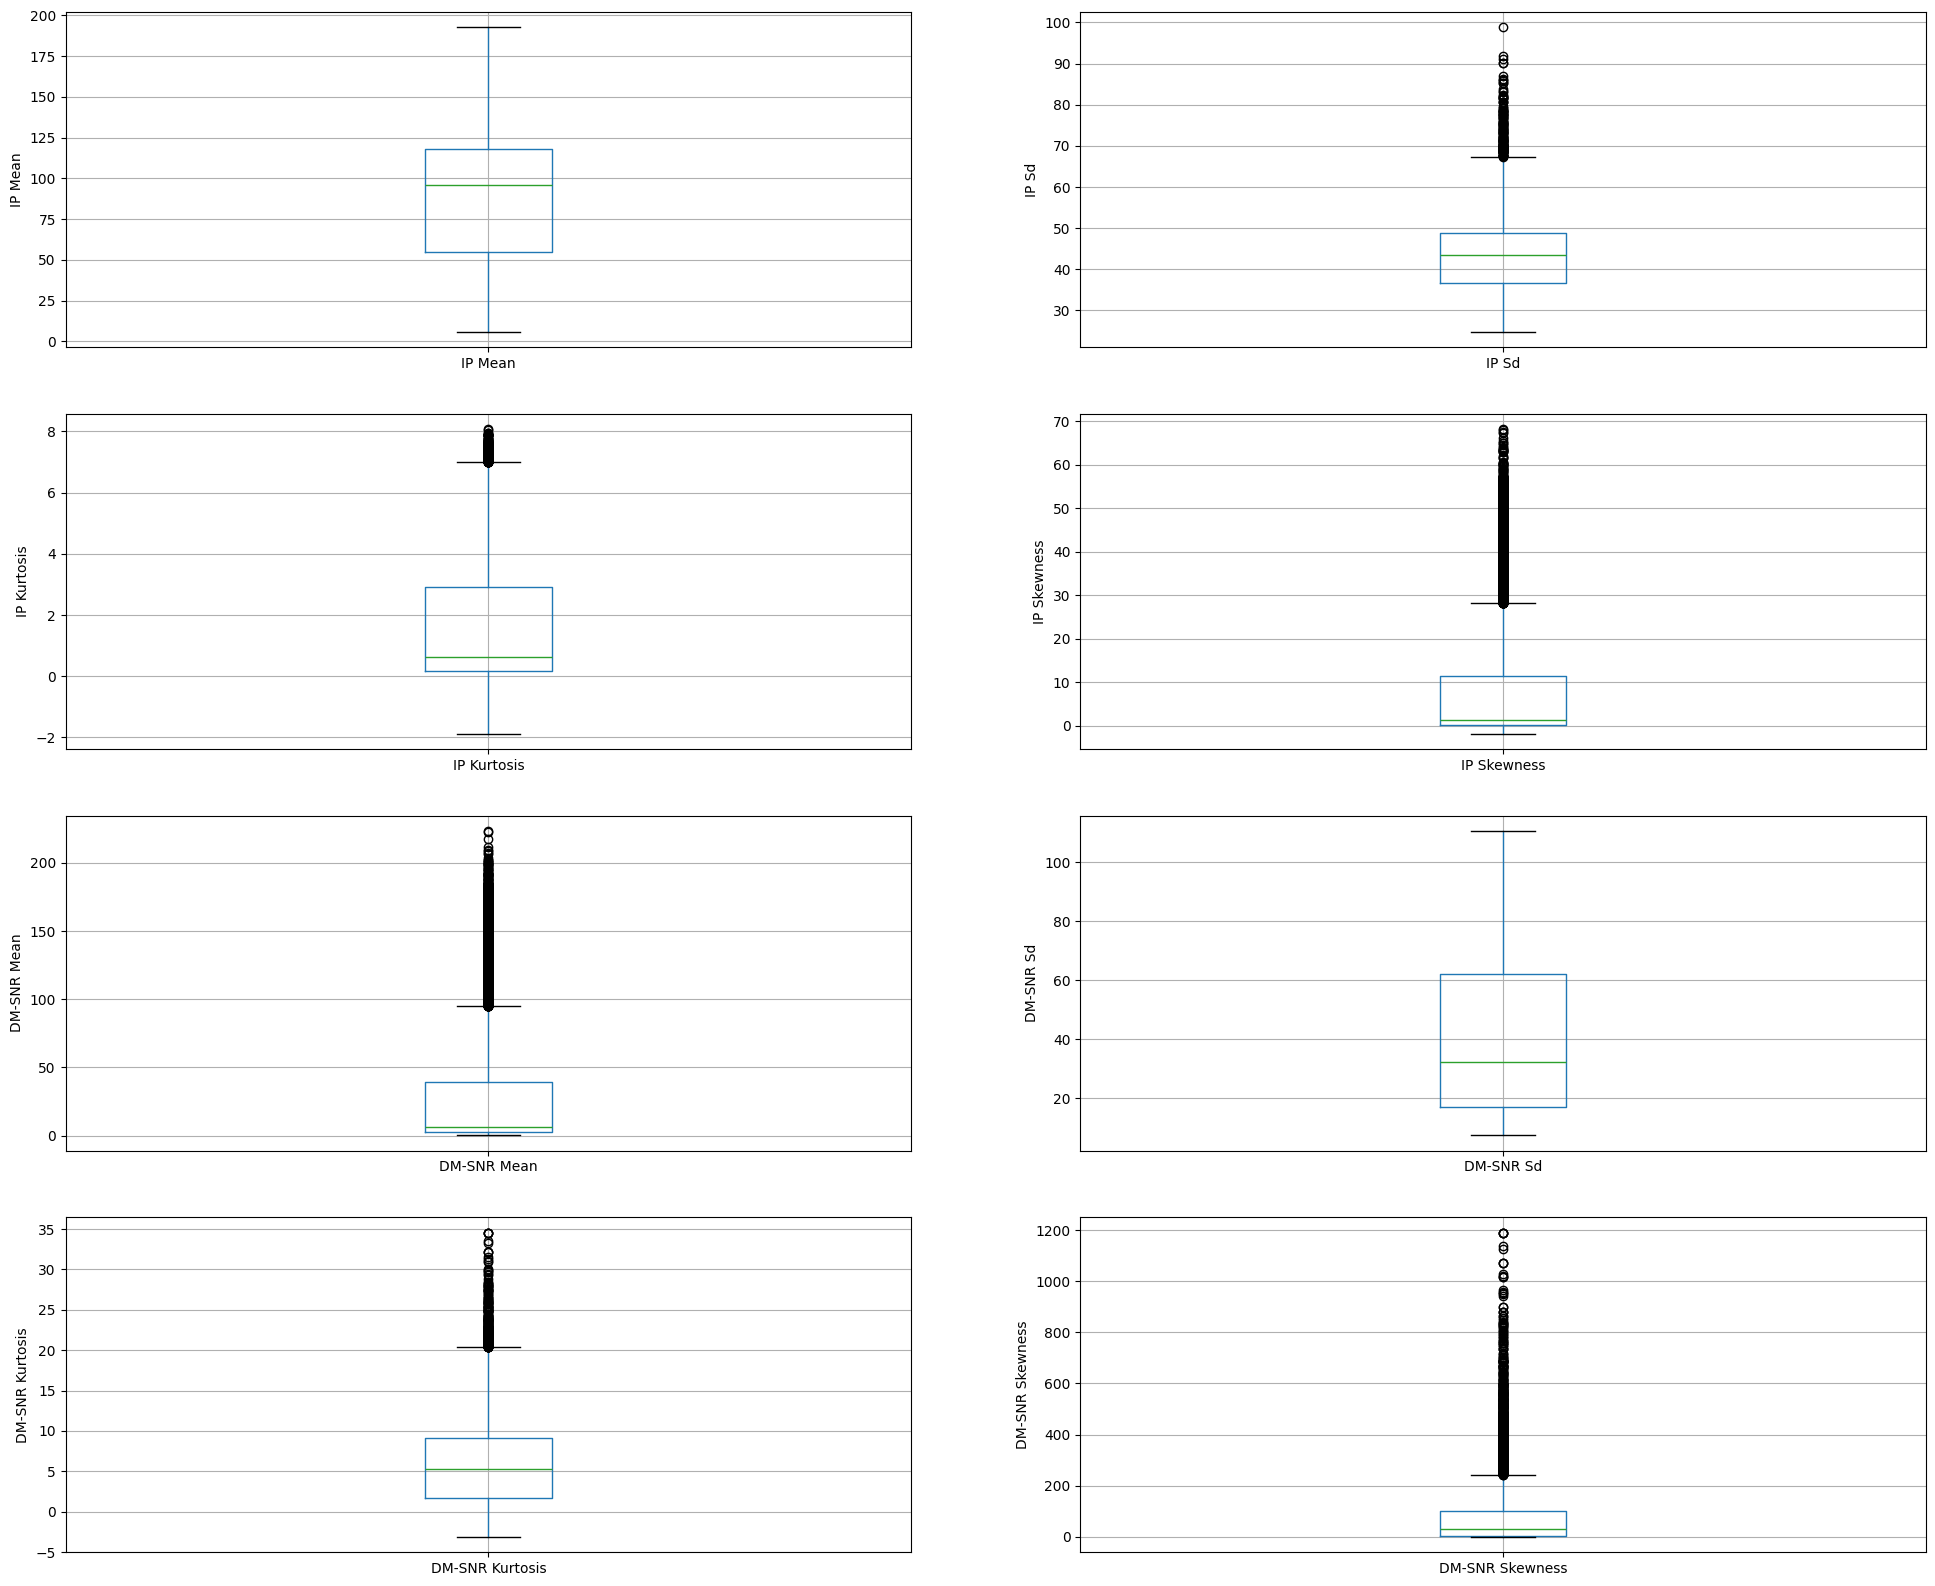

In [14]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of pulsar stars')

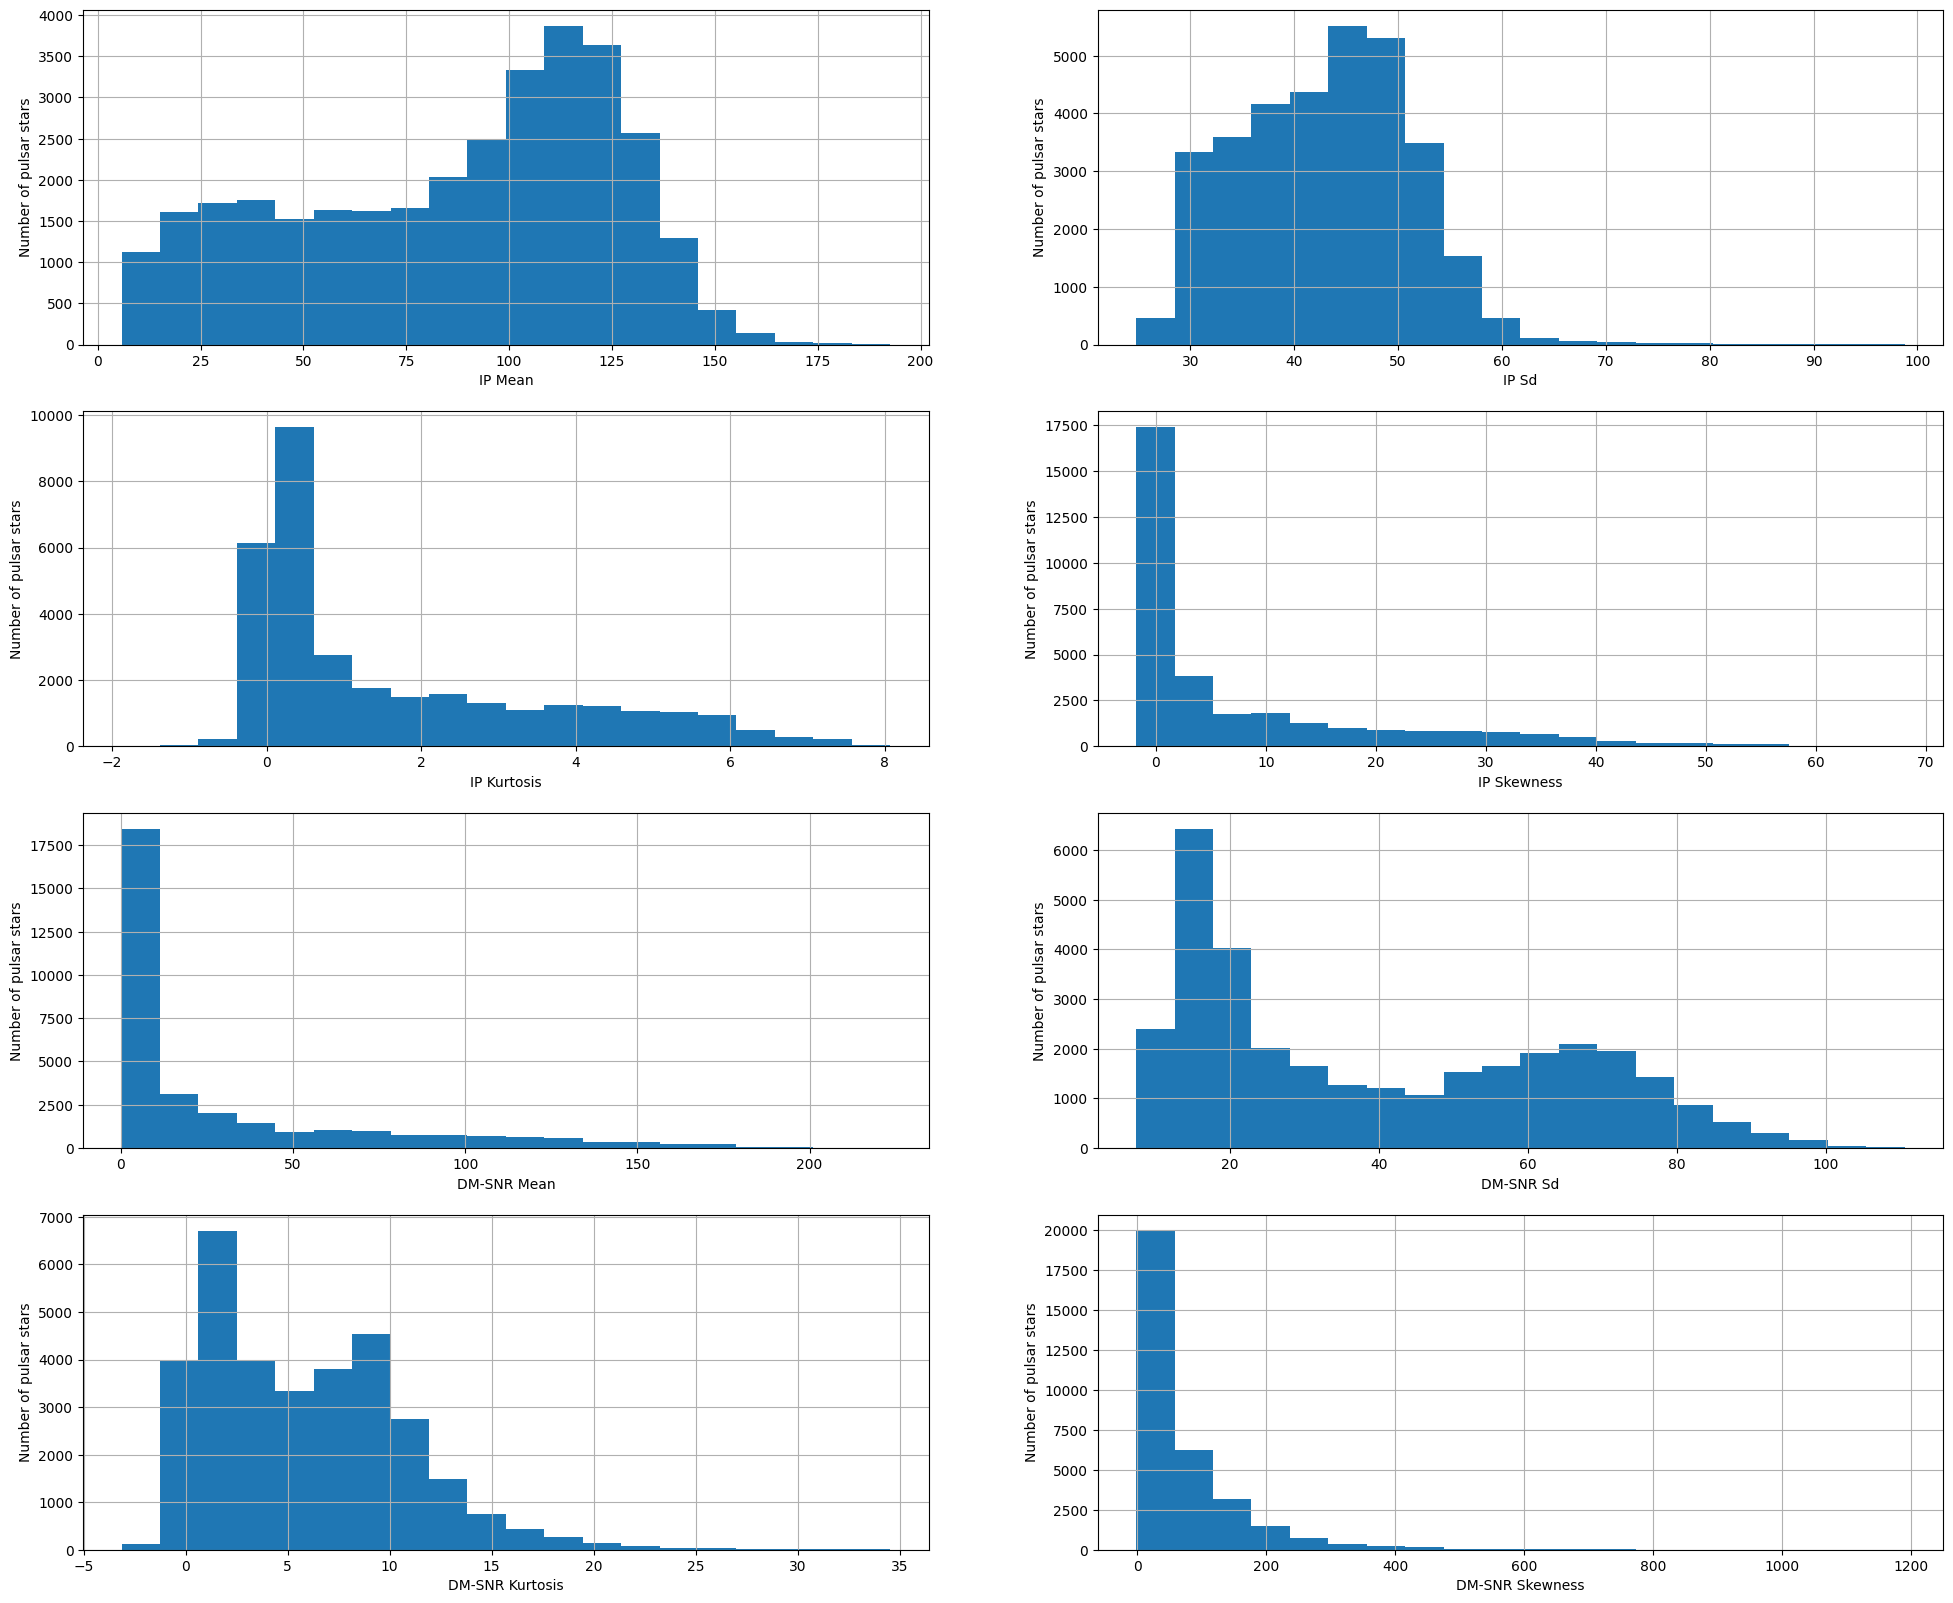

In [15]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')


In [16]:
df = df.sample(n=5000, random_state=0)

X = df.drop(['target_class'], axis=1)

y = df['target_class']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)


In [17]:
from sklearn.svm import SVC
import numpy as np

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

Kernel Matrix Generation

In [18]:
def create_custom_kernel(C):
    def custom_kernel(X, Y):
        linear_kernel = np.dot(X, Y.T)  # Linear kernel
        polynomial_kernel = (C + np.dot(X, Y.T)) ** 2  # Polynomial kernel 
        combined_kernel = linear_kernel + polynomial_kernel  # Combine linear and polynomial kernels
        return combined_kernel
    return custom_kernel

Implementation of SVM using Custom Kernel Matrix

In [19]:
custom_svc=SVC(kernel=create_custom_kernel(1)) 

start_time = time.time()

# fit classifier to training set
custom_svc.fit(X,y)

end_time = time.time()
custom_kernel_time= end_time - start_time


# make predictions on test set
y_pred=custom_svc.predict(X)



# compute and print accuracy score,Precision score, Recall score, F1 score
print('Model accuracy score with custom kernel : {0:0.4f}'. format(accuracy_score(y, y_pred)))

print('Model Precision score with custom kernel: {0:0.4f}'.format(precision_score(y, y_pred)))

print('Model Recall score with custom kernel: {0:0.4f}'.format(recall_score(y, y_pred)))

print('Model F1-score score with custom kernel: {0:0.4f}'.format(f1_score(y, y_pred)))


Model accuracy score with custom kernel : 0.9446
Model Precision score with custom kernel: 0.9779
Model Recall score with custom kernel: 0.9111
Model F1-score score with custom kernel: 0.9433


Implementation of SVM using Existing Kernel Matrices

In [20]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear') 

start_time = time.time()

# fit classifier to training set
linear_svc.fit(X,y)

end_time = time.time()
linear_kernel_time= end_time - start_time


# make predictions on test set
y_pred=linear_svc.predict(X)


# compute and print accuracy score,Precision score, Recall score, F1 score
print('Model accuracy score with linear kernel : {0:0.4f}'. format(accuracy_score(y, y_pred)))

print('Model Precision score with linear kernel: {0:0.4f}'.format(precision_score(y, y_pred)))

print('Model Recall score with linear kernel: {0:0.4f}'.format(recall_score(y, y_pred)))

print('Model F1-score score with linear kernel: {0:0.4f}'.format(f1_score(y, y_pred)))


Model accuracy score with linear kernel : 0.9360
Model Precision score with linear kernel: 0.9817
Model Recall score with linear kernel: 0.8901
Model F1-score score with linear kernel: 0.9337


In [21]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly') 

start_time = time.time()

# fit classifier to training set
poly_svc.fit(X,y)

end_time = time.time()
poly_kernel_time= end_time - start_time


# make predictions on test set
y_pred=poly_svc.predict(X)


# compute and print accuracy score,Precision score, Recall score, F1 score
print('Model accuracy score with polynomial kernel : {0:0.4f}'. format(accuracy_score(y, y_pred)))

print('Model Precision score with polynomial kernel: {0:0.4f}'.format(precision_score(y, y_pred)))

print('Model Recall score with polynomial kernel: {0:0.4f}'.format(recall_score(y, y_pred)))

print('Model F1-score score with polynomial kernel: {0:0.4f}'.format(f1_score(y, y_pred)))


Model accuracy score with polynomial kernel : 0.9292
Model Precision score with polynomial kernel: 0.9548
Model Recall score with polynomial kernel: 0.9028
Model F1-score score with polynomial kernel: 0.9281


In [22]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid') 

start_time = time.time()

# fit classifier to training set
sigmoid_svc.fit(X,y)

end_time = time.time()
sigmoid_kernel_time= end_time - start_time


# make predictions on test set
y_pred=sigmoid_svc.predict(X)


# compute and print accuracy score,Precision score, Recall score, F1 score
print('Model accuracy score with sigmoid kernel : {0:0.4f}'. format(accuracy_score(y, y_pred)))

print('Model Precision score with sigmoid kernel: {0:0.4f}'.format(precision_score(y, y_pred)))

print('Model Recall score with sigmoid kernel: {0:0.4f}'.format(recall_score(y, y_pred)))

print('Model F1-score score with sigmoid kernel: {0:0.4f}'.format(f1_score(y, y_pred)))


Model accuracy score with sigmoid kernel : 0.8612
Model Precision score with sigmoid kernel: 0.8652
Model Recall score with sigmoid kernel: 0.8597
Model F1-score score with sigmoid kernel: 0.8624


Comparison and Analysis

In [23]:
print("Accuracy of SVM with custom kernel: {0:0.4f} ". format(accuracy_score(y, custom_svc.predict(X))))
print("Accuracy of SVM with linear kernel: {0:0.4f} ". format(accuracy_score(y, linear_svc.predict(X))))
print("Accuracy of SVM with polynomial kernel: {0:0.4f} ". format(accuracy_score(y, poly_svc.predict(X))))
print("Accuracy of SVM with sigmoid kernel: {0:0.4f} ". format(accuracy_score(y, sigmoid_svc.predict(X))))

Accuracy of SVM with custom kernel: 0.9446 
Accuracy of SVM with linear kernel: 0.9360 
Accuracy of SVM with polynomial kernel: 0.9292 
Accuracy of SVM with sigmoid kernel: 0.8612 


In [24]:
print("Time taken by SVM with custom kernel: {0:0.4f} ". format(custom_kernel_time))
print("Time taken by SVM with linear kernel: {0:0.4f} ". format(linear_kernel_time))
print("Time taken by SVM with polynomial kernel: {0:0.4f} ". format(poly_kernel_time))
print("Time taken by SVM with sigmoid kernel: {0:0.4f} ". format(sigmoid_kernel_time))

Time taken by SVM with custom kernel: 1.4400 
Time taken by SVM with linear kernel: 0.3067 
Time taken by SVM with polynomial kernel: 0.5086 
Time taken by SVM with sigmoid kernel: 0.4527 


Optimization and Fine-tuning

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
X_train.shape, X_test.shape

((4000, 8), (1000, 8))

In [27]:
print(X_train)

[[ 1.31984287  0.14017144 -0.83929906 ... -0.7040285   0.61792419
   0.13879442]
 [ 0.21335429 -0.24515351 -0.79649973 ...  1.19861083 -0.80863837
  -0.65887759]
 [ 1.59281457  1.10374009 -1.14111837 ...  1.93197489 -0.973364
  -0.68656123]
 ...
 [-0.46370064 -0.25809449  0.26009489 ...  0.99970119 -0.87987804
  -0.66255496]
 [ 0.61652498 -0.12820863 -0.69703012 ... -1.07233044  0.69895796
   0.54859871]
 [-0.0904824  -0.2474616  -0.15061861 ...  0.43831711 -0.61782219
  -0.60216471]]


In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001]}

# Instantiate the classifier with sigmoid kernel
sigmoid_svc = SVC(kernel='sigmoid')

# Create the GridSearchCV object
grid_search = GridSearchCV(sigmoid_svc, param_grid)

# Fit the classifier to the training set
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 100, 'gamma': 0.001}
Best Score: 0.9270000000000002


In [29]:
# define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100]}

# instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=poly_svc, param_grid=param_grid)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print the best parameters and best score
print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'C': 100}
Best score: 0.9390000000000001


In [30]:
# define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100]}

# instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=linear_svc, param_grid=param_grid)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print the best parameters and best score
print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'C': 100}
Best score: 0.93675


In [31]:
# define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100]}

# instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=custom_svc, param_grid=param_grid)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print the best parameters and best score
print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'C': 1}
Best score: 0.9414999999999999


In [32]:

sigmoid_svc = SVC(kernel='sigmoid', C=100, gamma=0.001)

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_train=sigmoid_svc.predict(X_train)
y_pred_test=sigmoid_svc.predict(X_test)


# compute and print accuracy score,Precision score, Recall score, F1 score
print('Optimize Sigmoid Kernal SVM Model accuracy score with training data : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Optimize Sigmoid Kernal SVM Model accuracy score with test data : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Optimize Sigmoid Kernal SVM Model accuracy score with training data : 0.9285
Optimize Sigmoid Kernal SVM Model accuracy score with test data : 0.9370


In [33]:

poly_svc = SVC(kernel='poly', C=100)

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_train=poly_svc.predict(X_train)
y_pred_test=poly_svc.predict(X_test)


# compute and print accuracy score,Precision score, Recall score, F1 score
print('Optimize poly Kernal SVM Model accuracy score with training data : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Optimize poly Kernal SVM Model accuracy score with test data : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Optimize poly Kernal SVM Model accuracy score with training data : 0.9440
Optimize poly Kernal SVM Model accuracy score with test data : 0.9440


In [34]:

linear_svc = SVC(kernel='linear', C=1)

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_train=linear_svc.predict(X_train)
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score,Precision score, Recall score, F1 score
print('Optimize linear Kernal SVM Model accuracy score with training data : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Optimize linear Kernal SVM Model accuracy score with test data : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Optimize linear Kernal SVM Model accuracy score with training data : 0.9340
Optimize linear Kernal SVM Model accuracy score with test data : 0.9420


In [35]:
# instantiate classifier with sigmoid kernel and C=1.0
custom_svc = SVC(kernel=create_custom_kernel(1))

# fit classifier to training set
custom_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_train=custom_svc.predict(X_train)
y_pred_test=custom_svc.predict(X_test)


# compute and print accuracy score,Precision score, Recall score, F1 score
print('Optimize custom Kernal SVM Model accuracy score with training data : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Optimize custom Kernal SVM Model accuracy score with test data : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Optimize custom Kernal SVM Model accuracy score with training data : 0.9427
Optimize custom Kernal SVM Model accuracy score with test data : 0.9490


Visualization 

Time taken by SVM with custom kernel: 1.4400 
Time taken by SVM with linear kernel: 0.3100 
Time taken by SVM with polynomial kernel: 0.5100 
Time taken by SVM with polynomial kernel: 0.4500 


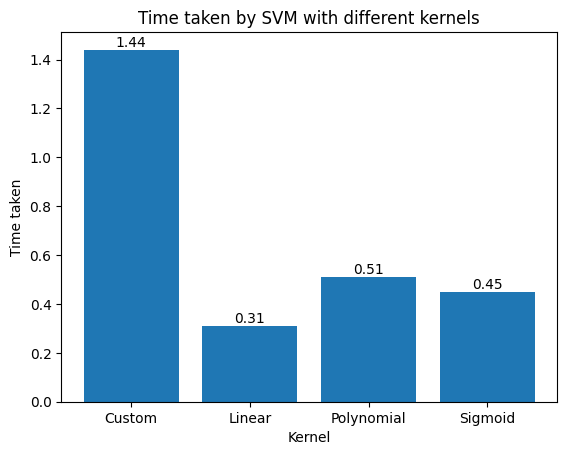

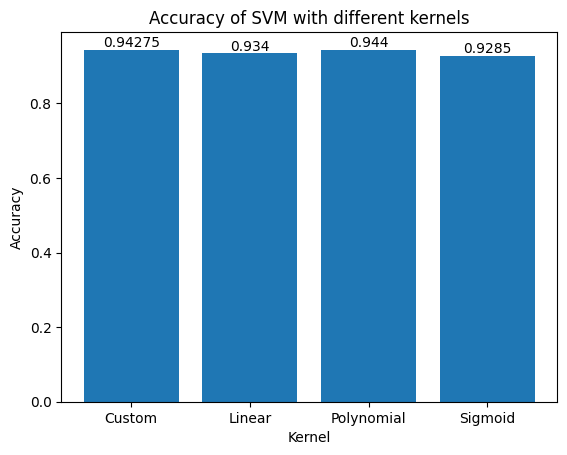

In [38]:
print("Time taken by SVM with custom kernel: {0:0.4f} ".format(round(custom_kernel_time,2)))
print("Time taken by SVM with linear kernel: {0:0.4f} ".format(round(linear_kernel_time,2)))
print("Time taken by SVM with polynomial kernel: {0:0.4f} ".format(round(poly_kernel_time,2)))
print("Time taken by SVM with polynomial kernel: {0:0.4f} ".format(round(sigmoid_kernel_time,2)))
import matplotlib.pyplot as plt

# Time taken by SVM with different kernels
time_taken = [round(custom_kernel_time,2), round(linear_kernel_time,2), round(poly_kernel_time,2), round(sigmoid_kernel_time,2)]
kernels = ['Custom', 'Linear', 'Polynomial', 'Sigmoid']

plt.bar(kernels, time_taken)
plt.xlabel('Kernel')
plt.ylabel('Time taken')
plt.title('Time taken by SVM with different kernels')

# Add line chart with bar values
for i, v in enumerate(time_taken):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Accuracy of SVM with different kernels
accuracy = [accuracy_score(y_train, custom_svc.predict(X_train)),
            accuracy_score(y_train, linear_svc.predict(X_train)),
            accuracy_score(y_train, poly_svc.predict(X_train)),
            accuracy_score(y_train, sigmoid_svc.predict(X_train))]
kernels = ['Custom', 'Linear', 'Polynomial', 'Sigmoid']

plt.bar(kernels, accuracy)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM with different kernels')

# Add line chart with bar values
for i, v in enumerate(accuracy):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()
